# HTTP Request test for one location

In [6]:
import requests
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Point
import numpy as np

# Variables
xcoordinates = 9.1900
ycoordinates = 45.4642
radius = 50

# The template for your link
link_template = "https://dealerlocator.fiat.com/geocall/RestServlet?jsonp=callback&mkt=1000&brand=066&func=finddealerxml&serv=sales&track=1&x={xcoordinate}&y={ycoordinates}&rad={radius}&_=1687532178449"

# Format the link with the correct coordinates and radius
link = link_template.format(xcoordinate=xcoordinates, ycoordinates=ycoordinates, radius=radius)

# Make the GET request
response = requests.get(link)

# Check if the request was successful
if response.status_code == 200:
    # Get the text of the response
    text = response.text

    # Remove 'callback(' from the start and ')' from the end
    json_text = text[len('callback('):-1]

    # Parse the JSON
    data = json.loads(json_text)

    # Now 'data' is a Python dictionary containing the data from the JSON response
    print(data)
else:
    print(f"Request failed with status code {response.status_code}")


{'results': [{'PP': 0, 'CENTRAL_BILLING': 0, 'N_CAMPAIGN9': ' ', 'N_CAMPAIGN7': ' ', 'N_CAMPAIGN8': ' ', 'MAINCODE': '0064292', 'N_CAMPAIGN5': ' ', 'N_CAMPAIGN6': ' ', 'FREETOGO': 0, 'N_CAMPAIGN3': ' ', 'N_CAMPAIGN4': ' ', 'BUSINESS_CENTER': 0, 'LEGAL_ZIPCODE': ' ', 'N_CAMPAIGN1': ' ', 'N_CAMPAIGN2': ' ', 'TAGLIANDISSIMO': 0, 'QUATTROC_SPECIALIST': 0, 'COMPANYNAM': 'STELLANTIS &YOU MILANO', 'REGISTRATI': '07016530011', 'DISTANCE': '3814.78', 'MARKET': '1000', 'AUTO_EXPERT': 0, 'TEL_1': ' ', 'TEL_2': ' ', 'LEGAL_ADDRESS': ' ', 'LEGAL_TOWN': ' ', 'FLAG10': 'N', 'FLAG11': 'N', 'FLAG12': 'N', 'FLAG13': 'N', 'FLAG14': 'N', 'FLAG15': 'N', 'FLAG16': 'N', 'FLAG17': 'N', 'FLAG18': 'N', 'FLAG19': 'N', 'PARTNERNAM': ' ', 'SITECODE': '000', 'RESPONSIBI': ' ', 'SINCOM': '0064292', 'ZIPCODE': '20149', 'FLAG20': 'N', 'ORGANIZED': 0, 'VATCODE': '07016530011', 'GENERAL_EMAIL': 'fca.center.italia@pec.fcagroup.com', 'LEGAL_PROV': ' ', 'MANDATE': ' ', 'NORMMANUAL': '0', 'SERVICEMYORG': {'33': True, '13': 

In [44]:


# Create an empty list to store the rows of the DataFrame
rows = []

# Loop over each dealership object in the 'results' list
for dealership in data['results']:
    # Create a dictionary with the data for this dealership
    row = {
        'Company Name': dealership['COMPANYNAM'],
        'Alt Name': dealership.get('COMPNAME2', ''),  # Using .get() to avoid KeyError if the key doesn't exist
        'Website': dealership.get('WEBSITE', ''),
        'Service Type': dealership.get('SERVICE', ''),
        'Coordinates': (dealership.get('XCOORD', ''), dealership.get('YCOORD', '')),
        'Zipcode': dealership.get('ZIPCODE', ''),
        'Legal Entity ID': dealership.get('LEGAL_ENTITY', '')
    }

    # Add the row to the list
    rows.append(row)

# Create a DataFrame from the list of rows
df = pd.DataFrame(rows)

df

,Company Name,Alt Name,Website,Service Type,Coordinates,Zipcode,Legal Entity ID
0,STELLANTIS &YOU MILANO,STELLANTIS &YOU ITALIA SPA STELLANTIS &YOU MILANO,www.motorvillagearese.it/concessionario/abarth...,sales,"(9.150759, 45.484594)",20149,0064292
1,MOCAUTOGROUP S.R.L.,MOCAUTOGROUP S.R.L.,www.mocauto-fcagroup.it/concessionario/abarth?...,sales,"(9.175952, 45.414302)",20142,0064287
2,Denicar S.p.A.,DENICAR S.P.A.,www.denicar-fcagroup.it/concessionario/abarth?...,sales,"(9.119037, 45.448956)",20152,0064443
3,DENICAR S.P.A.,DENICAR S.P.A.,www.denicar-fcagroup.it/concessionario/abarth?...,sales,"(9.094793, 45.481844)",20153,0064443
4,Fassina S.p.A.,FASSINA S.P.A.,www.fassina-fcagroup.it/concessionario/abarth?...,sales,"(9.118144, 45.520616)",20157,0064244
5,DENICAR S.P.A.,DENICAR S.P.A.,,sales,"(9.079883, 45.420187)",20090,0064443
6,SIMOCAR S.R.L.,SIMOCAR S.R.L.,,sales,"(9.16483, 45.56899)",20037,
7,MASSIRONI S.R.L.,MASSIRONI S.R.L.,www.massironi-fcagroup.it/concessionario/abart...,sales,"(9.32164, 45.36358)",20077,0064739
8,G. VILLA S.R.L.,G. VILLA S.R.L.,www.villa-fcagroup.it/concessionario/abarth?lo...,sales,"(9.254339, 45.60064)",20052,0064262
9,G. Villa S.r.l.,G. VILLA S.R.L.,www.villa-fcagroup.it/concessionario/abarth?lo...,sales,"(9.316, 45.579892)",20052,0064262


Now that the initial test is working for a specific coordinates, we need to make it for all coordinates. To do this we'll create a grid (made up of points) to which we'll make requests in those coordinates.

# Requesting for italy

1. First, we will load a geojson file of the municipalities of Italy 
2. Create a grid for 100km radius circles using thepolygons data of municipalities
3. Send requests for each of the points
4. Clean data (delete dupes, check errors, ...)

### Uploading GeoJson


Checking the Italy regions

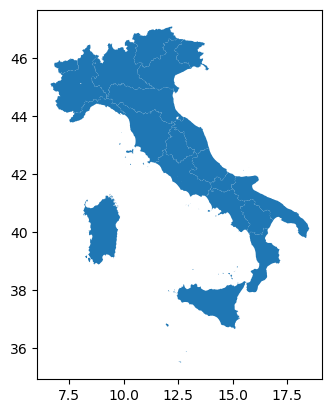

In [8]:
# Load the regions data
regions = gpd.read_file('Assets\limits_IT_regions.geojson')

# Plot the regions for initial visualization
regions.plot()
plt.show()

We test te function to create a grid , in one specific region

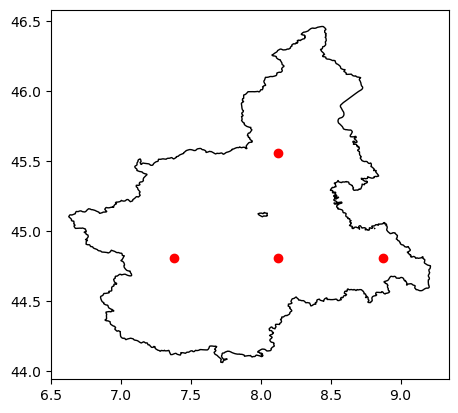

In [15]:
import shapely
from shapely import Point
import numpy as np

def create_grid_in_polygon(polygon, distance):
    # Create the grid
    minx, miny, maxx, maxy = polygon.bounds
    x = np.arange(minx, maxx, distance)
    y = np.arange(miny, maxy, distance)
    points = []
    for xi in x:
        for yi in y:
            point = Point(xi, yi)
            if polygon.contains(point):
                points.append(point)
    return points

# Test this function with one of the regions
polygon = regions.geometry[0]  # The first region
grid_points = create_grid_in_polygon(polygon, distance=0.75)

# Convert the grid_points list into a GeoSeries so we can plot it
grid_points = gpd.GeoSeries(grid_points)

fig, ax = plt.subplots()
regions.iloc[[0]].plot(ax=ax, edgecolor='black', color='none')  # Plot the region
grid_points.plot(ax=ax, color='red')  # Plot the grid points
plt.show()

We create the grid for all of the regions

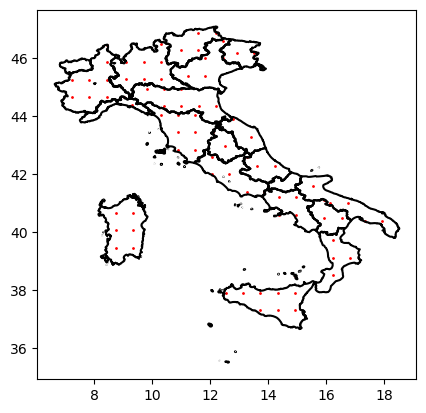

In [39]:
# Create a grid for each region
grids = []
for _, row in regions.iterrows():
    grid = create_grid_in_polygon(row.geometry, distance=0.60)
    grids.extend(grid)

# Convert the list into a GeoSeries
grids = gpd.GeoSeries(grids)

# Plot the regions and the grid
fig, ax = plt.subplots()
regions.boundary.plot(ax=ax, color='black')  # Plot the region's boundaries
grids.plot(ax=ax, color='red', markersize=1)  # Plot the grid points
plt.show()


We now have a list of the points that make up the grid, 85 points in total. so 85 requests to the link.

In [40]:
print("Number of points in the grid", len(grids))

Number of points in the grid 85


In [42]:
import folium

# Create a new Folium Map centered on Italy
map_italy = folium.Map(location=[42.5, 12.5], zoom_start=6)

# Add a circle for each grid point
for point in grids:
    folium.Circle(
        radius=75000,  # Radius in meters
        location=[point.y, point.x],  # Latitude, longitude
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map_italy)

# Display the map
map_italy


A grid of distance = 60 km and a radius of 75km seems to cover all of Italy. ( and a little bit of the neighbouring coutrnies, will clean it)

In [48]:
import time
import pandas as pd

# Create an empty list to store the rows of the DataFrame
rows = []

# Loop over each point in the grid
for point in grids:
    # Variables
    xcoordinate = point.x
    ycoordinate = point.y
    radius = 75  # km

    # Format the link with the correct coordinates and radius
    link = link_template.format(xcoordinate=xcoordinate, ycoordinates=ycoordinate, radius=radius)

    # Make the GET request
    response = requests.get(link)

    # Check if the request was successful
    if response.status_code == 200:
        # Get the text of the response
        text = response.text

        # Remove 'callback(' from the start and ')' from the end
        json_text = text[len('callback('):-1]

        # Parse the JSON
        data = json.loads(json_text)

        # If there's no 'results' field in the response, it implies there were no dealerships in that area
        if 'results' not in data:
            print(f"Received 0 results for coordinates ({xcoordinate}, {ycoordinate}),  Response from server was : ", data)
            continue

        # Check the number of results
        print(f"Received {len(data['results'])} results for coordinates ({xcoordinate}, {ycoordinate})")

        # Loop over each dealership object in the 'results' list
        for dealership in data['results']:
            # Create a dictionary with the data for this dealership
            row = {
                'Company Name': dealership['COMPANYNAM'],
                'Alt Name': dealership.get('COMPANYNAM2', ''),  # Using .get() to avoid KeyError if the key doesn't exist
                'Website': dealership.get('WEBSITE', ''),
                'Service Type': dealership.get('SERVICE', ''),
                'Coordinates': (dealership.get('XCOORD', ''), dealership.get('YCOORD', '')),
                'Zipcode': dealership.get('ZIPCODE', '')
            }

            # Add the row to the list
            rows.append(row)
    else:
        print(f"Request failed with status code {response.status_code} for coordinates ({xcoordinate}, {ycoordinate})")

    # Wait for 1 second before making the next request
    time.sleep(1.5)

# Create a DataFrame from the list of rows
df = pd.DataFrame(rows)




Received 15 results for coordinates (7.226621368537682, 44.6601191083047)
Received 14 results for coordinates (7.226621368537682, 45.2601191083047)
Received 19 results for coordinates (7.8266213685376815, 44.6601191083047)
Received 19 results for coordinates (7.8266213685376815, 45.2601191083047)
Received 15 results for coordinates (8.426621368537681, 44.6601191083047)
Received 37 results for coordinates (8.426621368537681, 45.2601191083047)
Received 27 results for coordinates (8.426621368537681, 45.8601191083047)
Received 3 results for coordinates (8.426621368537681, 46.4601191083047)
Received 11 results for coordinates (9.02662136853768, 44.6601191083047)
Received 48 results for coordinates (9.098337449907516, 45.27994448804671)
Received 39 results for coordinates (9.098337449907516, 45.87994448804671)
Received 46 results for coordinates (9.698337449907516, 45.27994448804671)
Received 35 results for coordinates (9.698337449907516, 45.87994448804671)
Received 29 results for coordinate

In [49]:
df.to_csv('Output\Data\Dealerships_raw.csv')

# Cleaning the data & Visualizing it

In [25]:
import ast

# Convert 'Coordinates' to tuples
df['Coordinates'] = df['Coordinates'].apply(ast.literal_eval)

# Remove 'Unnamed: 0' column
df_clean = df.drop("Unnamed: 0", axis=1)

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Display info about the cleaned DataFrame
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 957
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  236 non-null    object 
 1   Alt Name      0 non-null      float64
 2   Website       236 non-null    object 
 3   Service Type  236 non-null    object 
 4   Coordinates   236 non-null    object 
 5   Zipcode       236 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 12.9+ KB


In [27]:
# Create a new Folium map
m = folium.Map(location=[41.8719, 12.5674], zoom_start=6)  # Coordinates of Italy

# Loop through each row in the DataFrame
for index, row in df_clean.iterrows():
    # Get the coordinates for this row
    coords = row['Coordinates']
    
    # Reverse the coordinates
    coords = (coords[1], coords[0])
    
    # Add a marker to the map for these coordinates
    folium.CircleMarker(location=coords, radius=2, color='red', fill=True, fill_color='red').add_to(m)

# Display the map
m


3 kind of maps :

In [31]:
from folium.plugins import HeatMap, MarkerCluster
import branca.colormap as cm

# Heatmap with color bar
m1 = folium.Map(location=[41.8719, 12.5674], zoom_start=6)
coords_list = [(coord[1], coord[0]) for coord in df_clean['Coordinates']]  # Reverse coordinates
HeatMap(coords_list).add_to(m1)
# Creating a color bar and adding it to the map
m1.save("Output/Maps/Map1.html")

# Cluster map
m2 = folium.Map(location=[41.8719, 12.5674], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m2)
for coords in df_clean['Coordinates']:
    coords = (coords[1], coords[0])  # Reverse coordinates
    folium.Marker(location=coords).add_to(marker_cluster)
m2.save("Output/Maps/Map2.html")

# Circle markers with popups
m3 = folium.Map(location=[41.8719, 12.5674], zoom_start=6)
for index, row in df_clean.iterrows():
    coords = row['Coordinates']
    coords = (coords[1], coords[0])  # Reverse coordinates
    popup_text = f"Name: {row['Company Name']}"
    folium.CircleMarker(location=coords, radius=3, color='red', fill=True, fill_color='red', popup=popup_text).add_to(m3)
m3.save("Output/Maps/Map3.html")


# Bonus Data :   A table of dealership per provinces

In [44]:
import geopandas as gpd
from shapely.geometry import Point

# Load the GeoJSON file
provinces_gdf = gpd.read_file('Assets\limits_IT_provinces.geojson')

# Create a new 'geometry' column with Point objects representing dealership locations
geometry = [Point(xy[0], xy[1]) for xy in df_clean['Coordinates']]
gdf = gpd.GeoDataFrame(df_clean, geometry=geometry)

# Set the CRS for our GeoDataFrame to match the CRS in the GeoJSON
gdf.set_crs(epsg=4326, inplace=True)

# Create new DataFrame to store updated data
df_updated = pd.DataFrame(columns=df_clean.columns.tolist() + ['Province Name', 'Region Name'])

# Iterate over each province
for i, province in provinces_gdf.iterrows():
    # Iterate over each dealership
    for j, dealership in gdf.iterrows():
        # If the dealership is within the province
        if dealership.geometry.within(province.geometry):
            # Add the dealership data and the province data to the new DataFrame
            df_updated = df_updated.append({
                **dealership,
                'Province Name': province['prov_name'],
                'Region Name': province['reg_name']
            }, ignore_index=True)

df_updated

,Company Name,Alt Name,Website,Service Type,Coordinates,Zipcode,geometry,Province Name,Region Name
0,AUTOINGROS TORINO S.P.A. - AUTOINGROS,NaN,www.autoingros-fcagroup.it/concessionario/abar...,sales,"(7.306126, 44.882829)",10064,POINT (7.306126 44.882829),Torino,Piemonte
1,QUEEN CAR S.R.L.,NaN,www.queencar-fcagroup.it/concessionario/abarth...,sales,"(7.774415, 44.855186)",10022,POINT (7.774415 44.855186),Torino,Piemonte
2,Torino Auto S.p.A.,NaN,www.torinoauto-fcagroup.it/concessionario/abar...,sales,"(7.615714, 45.032198)",10137,POINT (7.615714 45.032198),Torino,Piemonte
3,TORINO AUTO S.P.A.,NaN,www.torinoauto-fcagroup.it/concessionario/abar...,sales,"(7.584874, 45.05268)",10095,POINT (7.584874 45.05268),Torino,Piemonte
4,STELLANTIS &YOU TORINO,NaN,www.mirafiorimotorvillage.it/concessionario/ab...,sales,"(7.624568, 45.034276)",10137,POINT (7.624568 45.034276),Torino,Piemonte
...,...,...,...,...,...,...,...,...,...
231,AutoA,NaN,www.autoa-fcagroup.it/concessionario/abarth?lo...,sales,"(8.529964, 40.733295)",7100,POINT (8.529964 40.733295),Sassari,Sardegna
232,Pincar S.r.l.,NaN,www.pincar-fcagroup.it/concessionario/abarth?l...,sales,"(9.510975, 40.933238)",7026,POINT (9.510975 40.933238),Sassari,Sardegna
233,Acentro,NaN,www.gruppoacentro-fcagroup.it/concessionario/a...,sales,"(9.123192, 39.238429)",9134,POINT (9.123192 39.238429),Cagliari,Sardegna
234,UNIDAC S.R.L. - ACENTRO,NaN,www.gruppoacentro-fcagroup.it/concessionario/a...,sales,"(8.591524, 39.900918)",9170,POINT (8.591524 39.900918),Oristano,Sardegna


In [ ]:
df_updated.to_csv('Output\Data\Dealerships_Final_deliverable.csv')

# Updated maps with data

In [7]:
import pandas as pd
import folium
from folium.plugins import HeatMap, MarkerCluster
import branca.colormap as cm
import geopandas as gpd
from shapely.geometry import Point
import ast

df_updated = pd.read_csv('Output\Data\Dealerships_Final_deliverable.csv')
df_updated['Coordinates'] = df_updated['Coordinates'].apply(ast.literal_eval)

In [8]:
def add_http(url):
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url
    return url

# Cluster map
m2 = folium.Map(location=[41.8719, 12.5674], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m2)
for index, row in df_updated.iterrows():
    coords = row['Coordinates']
    coords = (coords[1], coords[0])  # Reverse coordinates
    website = add_http(row['Website'])
    popup_text = f"""
                <strong>Name:</strong> {row['Company Name']}<br>
                <strong>Province:</strong> {row['Province Name']}<br>
                <strong>Website:</strong> <a href={website} target="_blank">Link</a>
                """
    folium.Marker(location=coords, popup=folium.Popup(popup_text, max_width=300)).add_to(marker_cluster)
m2.save("Output/Maps/Map2.html")

# Circle markers with popups
m3 = folium.Map(location=[41.8719, 12.5674], zoom_start=6)
for index, row in df_updated.iterrows():
    coords = row['Coordinates']
    coords = (coords[1], coords[0])  # Reverse coordinates
    website = add_http(row['Website'])
    popup_text = f"""
                <strong>Name:</strong> {row['Company Name']}<br>
                <strong>Province:</strong> {row['Province Name']}<br>
                <strong>Website:</strong> <a href={website} target="_blank">Link</a>
                """
    folium.CircleMarker(location=coords, radius=5, color='red', fill=True, fill_color='red',
                        popup=folium.Popup(popup_text, max_width=300)).add_to(m3)
m3.save("Output/Maps/Map3.html")